In [2]:
# Mount Google Drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import models,layers,losses,callbacks
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn

In [5]:
# Load the MNIST dataset
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()
print(x_train.shape) # Display the shape of the training set

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)


In [6]:
# Reshape the data to include a channel dimension
x_train = x_train.reshape(-1, 28, 28, 1) # Reshape for CNN input
x_test = x_test.reshape(-1, 28, 28, 1)
print(x_train.shape) # Print the new shape of the training data

(60000, 28, 28, 1)

9


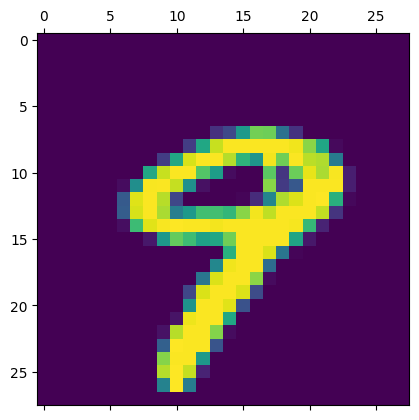

In [7]:
# Visualize a sample image from the test set
plt.matshow(x_test[9])  # Display the 10th test image
print(y_test[9]) # Print the true label for this image

In [8]:
# Normalize the pixel values to the range [0, 1]
x_train=x_train/255
x_test=x_test/255
print('shapee of x_train:',x_train.shape) # Print the shape of the training data
print('shapee of x_test:',x_test.shape) # Print the shape of the test data

shapee of x_train: (60000, 28, 28, 1)
shapee of x_test: (10000, 28, 28, 1)


In [9]:
# Data augmentation to enhance model robustness
data_aug=tf.keras.Sequential([
    layers.RandomZoom(0.3),
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

In [19]:
# Function to create and compile the model
def my_model():
  model=models.Sequential([
      data_aug,
      layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)),
      layers.MaxPool2D((2,2)),
      layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
      layers.MaxPool2D((2,2)),
      layers.Flatten(),
      layers.Dense(256,activation='relu'),
      layers.Dropout(0.5),
      layers.Dense(128,activation='relu'),
      layers.Dropout(0.5),
      layers.Dense(64,activation='relu'),
      layers.Dropout(0.5),
      layers.Dense(32,activation='relu'),
      layers.Dense(10,activation='softmax')
  ])
  model.compile(
      optimizer='adam',
      loss=losses.sparse_categorical_crossentropy,
      metrics=['accuracy']
  )
  return model


# Function to evaluate the model
def eval(model, X, Y):
    model.evaluate(X, Y)

# Function for making predictions
def prediction(model, X, Y):
    Y_predict = model.predict(X)
    Y_pred = [np.argmax(i) for i in Y_predict]
    print('Predicted the first five labels:', Y_pred[:5])
    print('True labels of the first five elements:', Y[:5])
    return Y_pred

# Function to display classification report and confusion matrix
def report(truth, predictions):
    print(classification_report(truth, predictions))
    cm = tf.math.confusion_matrix(labels=truth, predictions=predictions)
    plt.figure(figsize=(10, 7))
    sn.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')

# Function to plot training and validation loss
def plot_loss(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    plt.show()

# Function to plot training and validation accuracy
def plot_accuracy(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()
    plt.show()



In [20]:
# Create and train the model
model=my_model() # Instantiate the model
tb_callback=callbacks.TensorBoard(log_dir='/logs',histogram_freq=1) # Set up TensorBoard callback
history=model.fit(x_train,y_train,epochs=50,validation_split=0.2,callbacks=tb_callback) # Train the model

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 63s 39ms/step - accuracy: 0.3242 - loss: 1.8225 - val_accuracy: 0.8257 - val_loss: 0.5078
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 53s 36ms/step - accuracy: 0.7210 - loss: 0.8219 - val_accuracy: 0.9135 - val_loss: 0.3012
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 36ms/step - accuracy: 0.8130 - loss: 0.6100 - val_accuracy: 0.9229 - val_loss: 0.2536
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 52s 35ms/step - accuracy: 0.8518 - loss: 0.5087 - val_accuracy: 0.9306 - val_loss: 0.2446
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 57s 38ms/step - accuracy: 0.8711 - loss: 0.4482 - val_accuracy: 0.9378 - val_loss: 0.2177
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 56s 38ms/step - accuracy: 0.8818 - loss: 0.4237 - val_accuracy: 0.9478 - val_loss: 0.1858
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 84s 39ms/step - accuracy: 0.8911 - loss: 0.3906 - val_accuracy: 0.9561 - val_loss: 0.1545
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 79s 38ms/step - accuracy: 0.8948 -

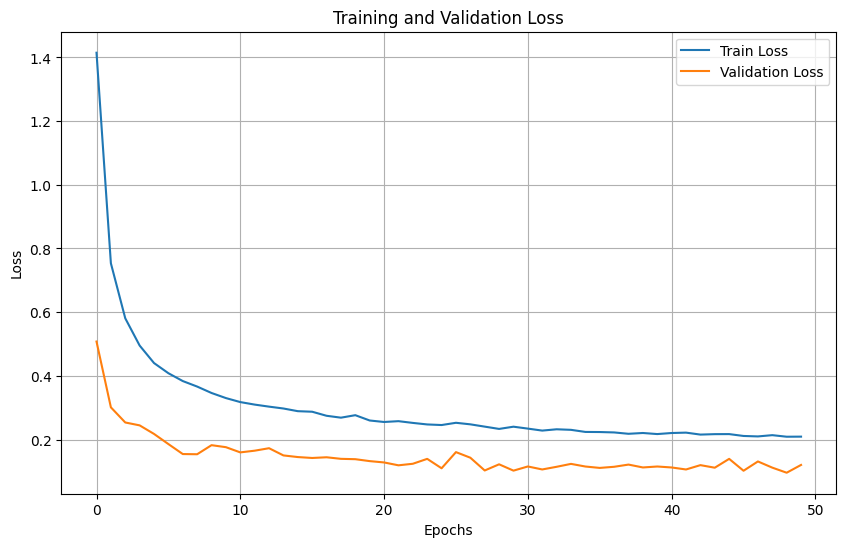

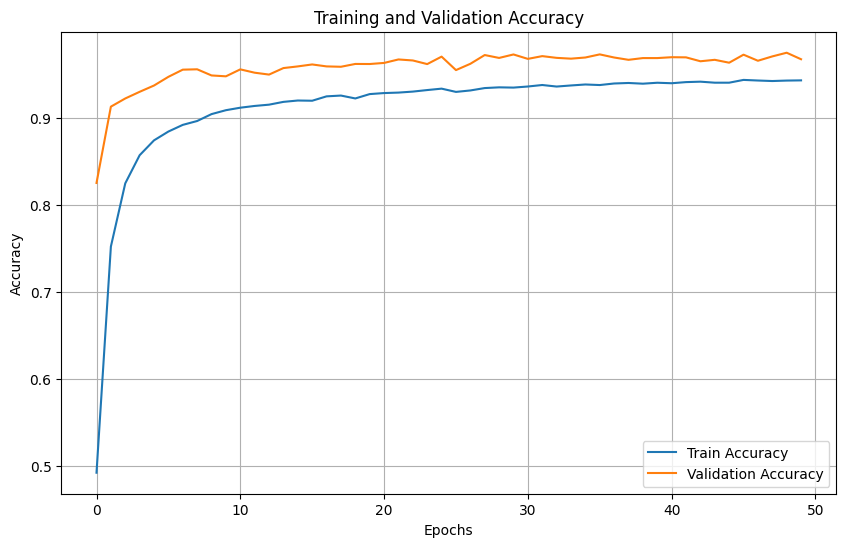

In [21]:
# Plot training and validation loss and accuracy
plot_loss(history)
plot_accuracy(history)

In [22]:
# Evaluate the model on the test set
eval(model,x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9643 - loss: 0.1234


In [23]:
# Make predictions
preds=prediction(model,x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
Predicted the first five labels: [np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4)]
True labels of the first five elements: [7 2 1 0 4]


              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.94      0.99      0.96      1032
           3       0.97      0.99      0.98      1010
           4       0.97      0.98      0.97       982
           5       0.97      0.96      0.97       892
           6       0.96      0.93      0.94       958
           7       0.95      0.94      0.94      1028
           8       0.98      0.97      0.98       974
           9       0.96      0.93      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



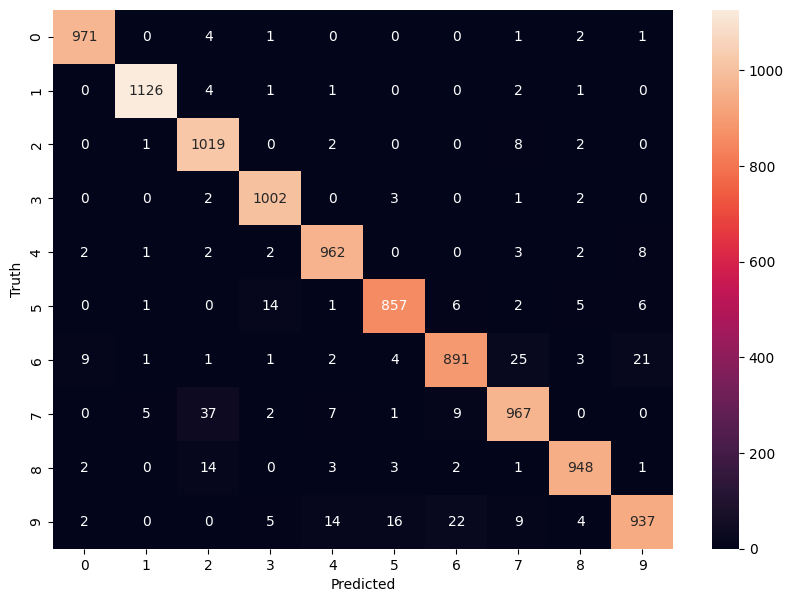

In [27]:
#Generate a report
report(y_test,preds)